<a href="https://colab.research.google.com/github/TzurV/TestMe/blob/master/TORCHAUDIO_TUTORIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[TORCHAUDIO TUTORIAL](https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html)

In [ ]:
!pip install torchaudio

     |████████████████████████████████| 3.2MB 3.4MB/s 


In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')
# from https://stackoverflow.com/questions/47744131/colaboratory-can-i-access-to-my-google-drive-folder-and-file


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#https://colab.research.google.com/notebooks/io.ipynb#scrollTo=XDg9OBaYqRMd
# External data: Local Files, Drive, Sheets, and Cloud Storage

import os
#os.chdir("/content/drive/")
#os.chdir("/")
#!ls

with open('/content/drive/My Drive/foo1.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo1.txt

os.chdir('/content/drive/My Drive/Colab_files')
!ls


Hello Google Drive!p225_001.wav


<class 'torch.Tensor'>
Shape of waveform: torch.Size([1, 98473])
Sample rate of waveform: 48000


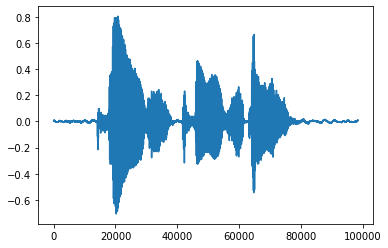

In [ ]:
import torch
import torchaudio
import matplotlib.pyplot as plt

# Opening a file
#filename = "../_static/img/steam-train-whistle-daniel_simon-converted-from-mp3.wav"
filename = "/content/drive/My Drive/Colab_files/p225_001.wav"
waveform, sample_rate = torchaudio.load(filename)

print(type(waveform))
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.figure()
plt.plot(waveform.t().numpy())

Shape of spectrogram: torch.Size([1, 201, 493])
Shape of spectrogram: torch.Size([1, 40, 493])


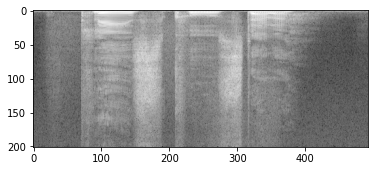

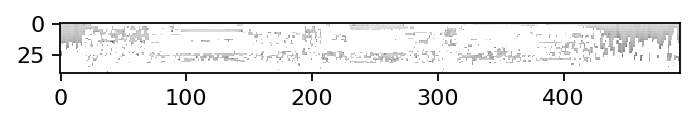

In [ ]:
# Transformations
# https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html#transformations

# Spectrogram: Create a spectrogram from a waveform.
specgram = torchaudio.transforms.Spectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy(), cmap='gray')

# MFCC: Create the Mel-frequency cepstrum coefficients from a waveform.
MFCC = torchaudio.transforms.MFCC()(waveform)

print("Shape of spectrogram: {}".format(MFCC.size()))

#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
fig = plt.figure(dpi=160, figsize=(5,2))
plt.imshow(MFCC.log2()[0,:,:].numpy(), cmap='gray')
fig.set_figheight(2)
#fig.set_figwidth(value_width)


In [ ]:
#Since the waveform is already between -1 and 1, we do not need to normalize it.

def normalize(tensor):
    # Subtract the mean, and scale to the interval [-1,1]
    tensor_minusmean = tensor - tensor.mean()
    return tensor_minusmean/tensor_minusmean.abs().max()

# Let's normalize to the full interval [-1,1]
# waveform = normalize(waveform)

Shape of transformed waveform: torch.Size([1, 98473])
Shape of recovered waveform: torch.Size([1, 98473])
reconstructed -  torch.Size([1, 98473])
<class 'torch.Tensor'>
dif size  torch.Size([1, 98473])


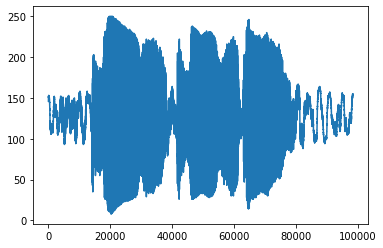

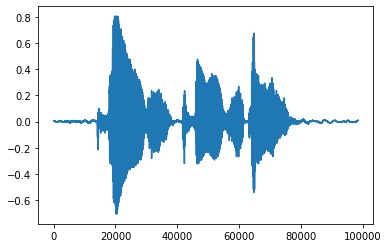

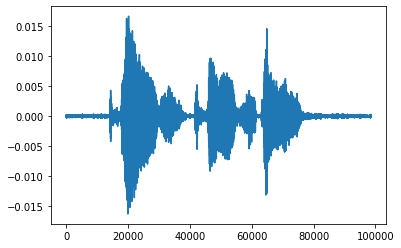

In [ ]:
# Let’s apply MuLawEncoding encode the waveform.
transformed = torchaudio.transforms.MuLawEncoding()(waveform)

print("Shape of transformed waveform: {}".format(transformed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())

# And now decode.

reconstructed = torchaudio.transforms.MuLawDecoding()(transformed)

print("Shape of recovered waveform: {}".format(reconstructed.size()))

plt.figure()
plt.plot(reconstructed[0,:].numpy())
print("reconstructed - ", reconstructed.size())
plt.figure()
dif = (reconstructed-waveform)
print(type(dif))
print("dif size ", dif.size())
plt.plot(dif[0,:].numpy())

tensor([1.1000e+01, 5.9000e+01, 3.1600e+02, 2.1270e+03, 7.2290e+04, 2.1555e+04,
        1.7600e+03, 2.8400e+02, 5.8000e+01, 1.3000e+01])


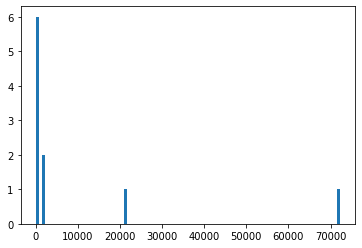

In [ ]:
#https://pytorch.org/docs/stable/torch.html

dif_hist = torch.histc(dif, bins=10)
print(dif_hist)

plt.hist(dif_hist, bins = 100)
plt.show()

In [ ]:
# Compute median relative difference
err = ((waveform-reconstructed).abs() / waveform.abs()).median()

print("Median relative difference between original and MuLaw reconstucted signals: {:.2%}".format(err))

Median relative difference between original and MuLaw reconstucted signals: 1.56%


# [Available Datasets](https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html#available-datasets)

If you do not want to create your own dataset to train your model, torchaudio offers a unified dataset interface. This interface supports lazy-loading of files to memory, download and extract functions, and datasets to build models.

The datasets torchaudio currently supports are:

VCTK: Speech data uttered by 109 native speakers of English with various accents (Read more here).
Yesno: Sixty recordings of one individual saying yes or no in Hebrew; each recording is eight words long (Read more here).
Common Voice: An open source, multi-language dataset of voices that anyone can use to train speech-enabled applications (Read more here).
LibriSpeech: Large-scale (1000 hours) corpus of read English speech (Read more here).


Waveform: tensor([[-3.0518e-05,  3.0518e-05, -3.0518e-05,  ..., -4.0771e-02,
         -4.3121e-02, -4.6783e-02]])
Sample rate: 8000
Labels: [1, 1, 1, 1, 0, 1, 0, 0]


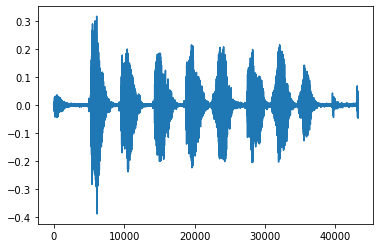

In [ ]:
yesno_data = torchaudio.datasets.YESNO('./', download=True)

# A data point in Yesno is a tuple (waveform, sample_rate, labels) where labels is a list of integers with 1 for yes and 0 for no.

# Pick data point number 3 to see an example of the the yesno_data:
n = 3
waveform, sample_rate, labels = yesno_data[n]

print("Waveform: {}\nSample rate: {}\nLabels: {}".format(waveform, sample_rate, labels))

plt.figure()
plt.plot(waveform.t().numpy())